# Explore here

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
import missingno as msno
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv",sep=',')
data.to_csv('/workspaces/dicision_tree_joeld/data/raw/diabetes.csv',index=False)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape


(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.duplicated().sum()


0

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
len(data[data['Glucose']==0])

5

In [8]:
len(data[data['Insulin']==0])

374

In [9]:
len(data[data['BloodPressure']==0])

35

In [10]:
data[['Glucose','Insulin','BloodPressure','SkinThickness','BMI']] = data[['Glucose','Insulin','BloodPressure','SkinThickness','BMI']].replace(0, np.nan)

In [11]:
data.isnull().mean()*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [12]:
data.isnull().any(axis=1).sum()/len(data)*100

48.95833333333333

Podemos observar que en un gran numero de datos son enrealidad datos nulos ya que es imposible que por ejemplo una persona tenga un nivel de insulina en sangre de 0 o la precion arterial sea 0 por lo que primero convertimos en nulos estos valores ahora estudiaremos el caso a ver que podemos hacer con estos valores nulos 


<Axes: >

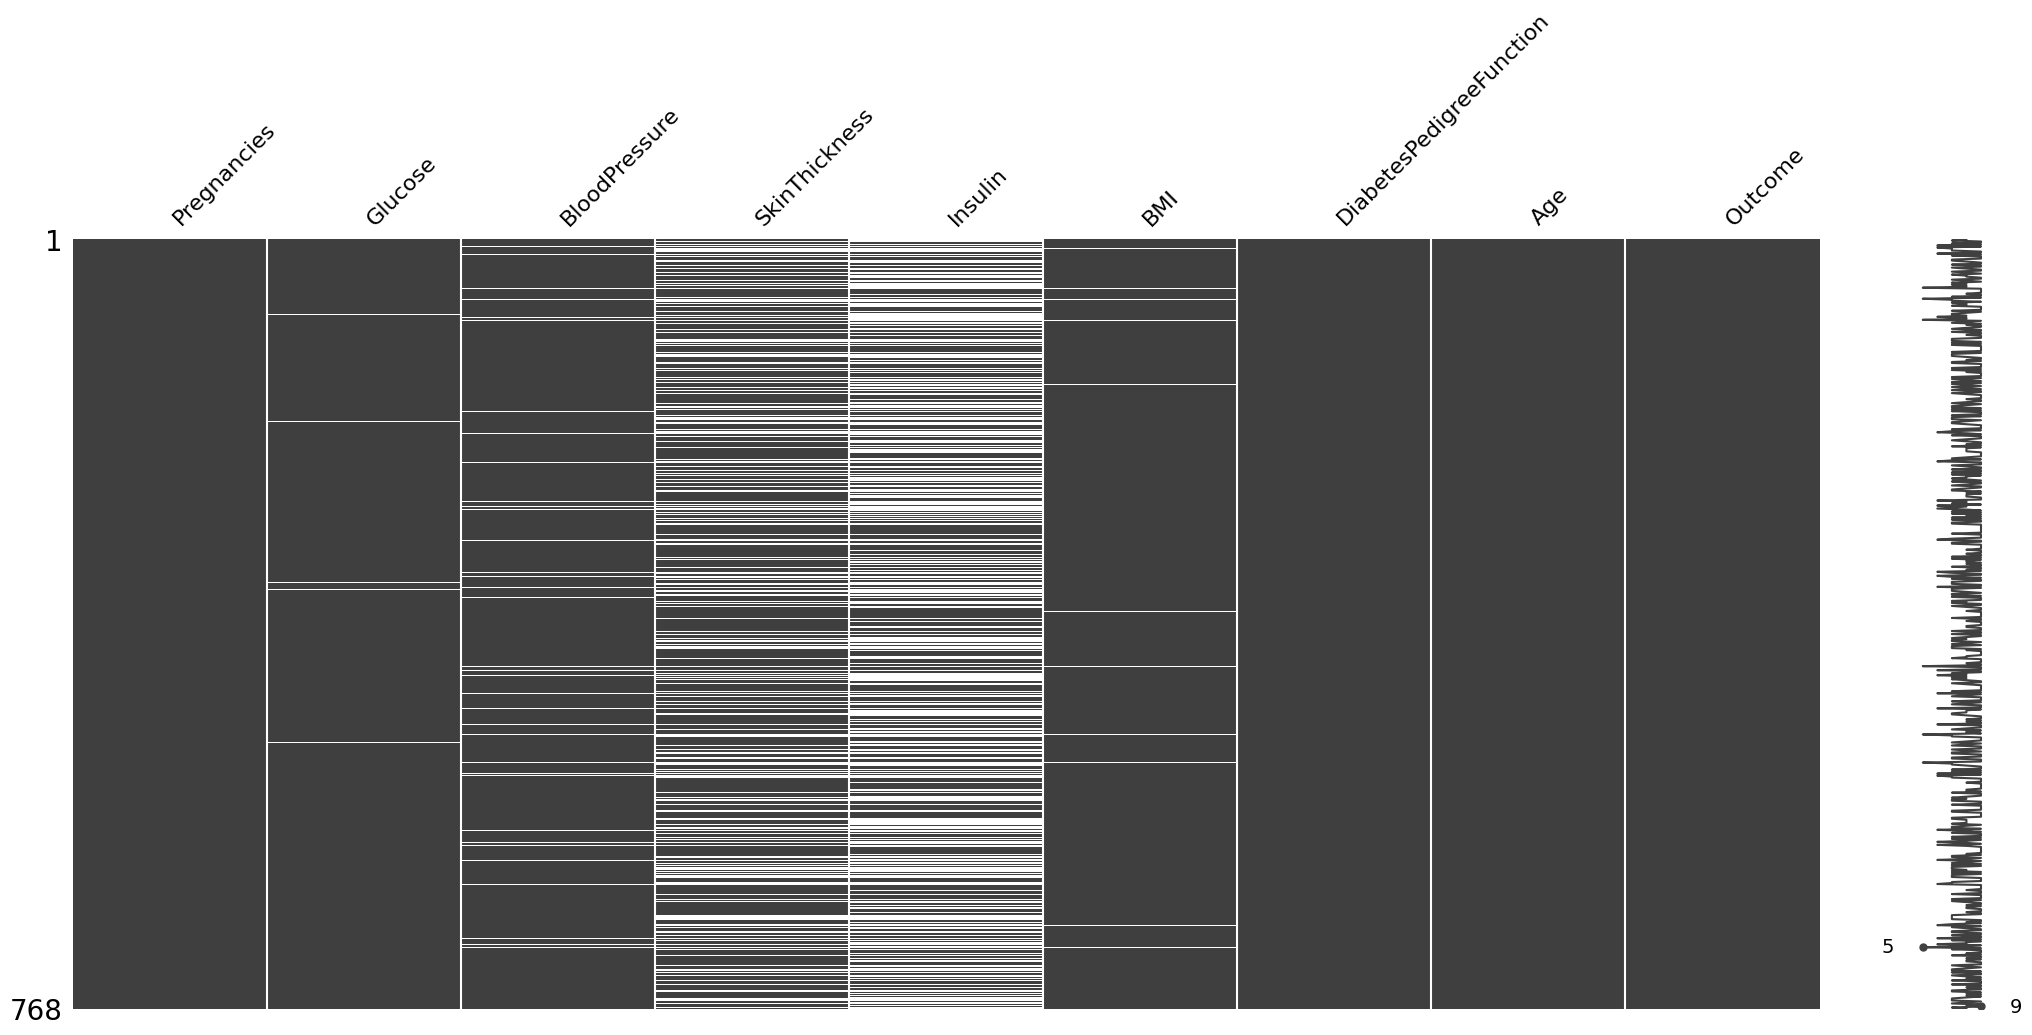

In [13]:
msno.matrix(data)

podemos observar que el 48% de los datos de insulina son nulos por lo que si estuvieramos en un caso real de trabajo directamente tendriamos que pedir mas datos ya que con estos no tiene logica contruir un modelo en este caso es una ejercicio lo que voy a hacer es quitar la columna de insulina aunque esto seguramente de que el resultado del modelo no sea muy efectivo y ademas impiutare los datos de BloodPressure y SkinThickness por la media ya que deberian mas o menos seguir una distribucion normal y el SkinThickness lo hare cone l metodod e Knn

In [14]:
data.drop(['Insulin'],axis=1,inplace=True)

In [15]:
imputador_knn = KNNImputer(n_neighbors=4)
data['SkinThickness'] = imputador_knn.fit_transform(data[['SkinThickness']])

In [16]:
imputador_simp = SimpleImputer(missing_values=np.nan, strategy='mean')
data[['BloodPressure','BMI']] = imputador_simp.fit_transform(data[['BloodPressure','BMI']])

In [17]:
data.isnull().sum()

Pregnancies                 0
Glucose                     5
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Eliminamos las 5 filas con valores nulos de glucosa 

In [18]:
data.dropna(inplace=True)

In [19]:
data.isnull().mean()*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [20]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.128,0.207,0.081,0.018,-0.036,0.543,0.219
Glucose,0.128,1.000,0.219,0.194,0.232,0.137,0.267,0.495
BloodPressure,0.207,0.219,1.000,0.192,0.279,-0.005,0.324,0.165
SkinThickness,0.081,0.194,0.192,1.000,0.541,0.098,0.125,0.212
BMI,0.018,0.232,0.279,0.541,1.000,0.152,0.022,0.308
DiabetesPedigreeFunction,-0.036,0.137,-0.005,0.098,0.152,1.000,0.031,0.172
Age,0.543,0.267,0.324,0.125,0.022,0.031,1.000,0.235
Outcome,0.219,0.495,0.165,0.212,0.308,0.172,0.235,1.000


In [21]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Vamos a usar un método embebido que nos informe de la importancia de las características
# Crea un modelo XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror')

# Entrena el modelo en los datos de entrenamiento
model.fit(X_train, y_train)

# Calcula la importancia de las características
feature_importances = model.feature_importances_

# Asocia las importancias con los nombres de las características
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Ordena las características por importancia (de mayor a menor)
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# Imprime la importancia de las características (número adimensional, las características se comparan entre sí en términos de su contribución relativa a la predicción)
for feature, importance in sorted_feature_importance.items():
    print(f'Feature: {feature}, Importance: {importance}')

Feature: Glucose, Importance: 0.25229814648628235
Feature: BMI, Importance: 0.21868301928043365
Feature: Age, Importance: 0.18689961731433868
Feature: DiabetesPedigreeFunction, Importance: 0.11225073039531708
Feature: SkinThickness, Importance: 0.09181081503629684
Feature: BloodPressure, Importance: 0.08448968082666397
Feature: Pregnancies, Importance: 0.05356799438595772


In [23]:
def get_vars_to_delete(d_imp, corr, imp_cut=0.005, corr_cut=0.1):
  ls_vars_low_corr = corr[corr.Outcome.abs()<=corr_cut].index
  return [var for var in ls_vars_low_corr if d_imp[var]<=imp_cut]

In [24]:
vars_to_drop = get_vars_to_delete(sorted_feature_importance, corr, imp_cut=0.05, corr_cut=0.15)
vars_to_drop

[]

Nos damos cuenta que con estas variables podemos seguir trabajando 

In [25]:
X_train["Outcome"] = y_train.values
X_test["Outcome"] = y_test.values
X_train.to_csv("../data/processed/clean_train.csv", index = False)
X_test.to_csv("../data/processed/clean_test.csv", index = False)

In [26]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

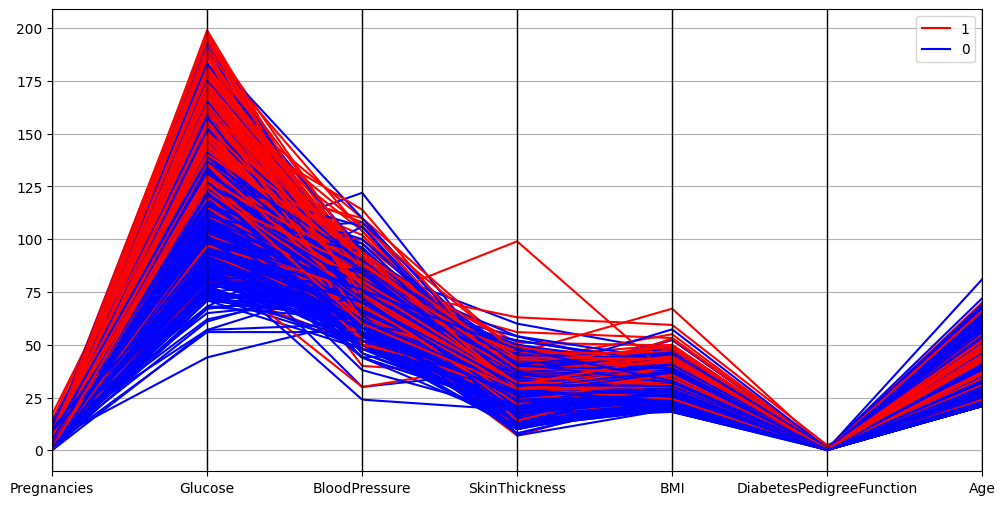

In [27]:
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data, 'Outcome', color=['red', 'blue'])
plt.show()

In [28]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [29]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [31]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [32]:
get_metrics(y_train, y_test, train_pred, test_pred)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.00,1.000000,1.0
Test,0.738562,0.591837,0.702083,0.58,0.604167,0.8
Diferencia,0.261438,0.408163,0.297917,0.42,0.395833,0.2


In [33]:


hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid = GridSearchCV(model, hyperparams, scoring = "precision", cv = 10)


In [34]:
print(grid)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='precision')


In [35]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='precision')

In [36]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [37]:
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5,min_samples_leaf= 2, min_samples_split= 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=42)

In [38]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [39]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [40]:
get_metrics(y_train, y_test, train_pred, test_pred)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.829508,0.726316,0.785902,0.851852,0.633028,0.938776
Test,0.777778,0.630435,0.730655,0.659091,0.604167,0.857143
Diferencia,0.051730,0.095881,0.055247,0.192761,0.028861,0.081633


como podemos ver ahora ya el modelo no esta memorizando los datos de entrenamiento aunque es verdad que los datos no son optimos como para que tengamos un buen modelo 

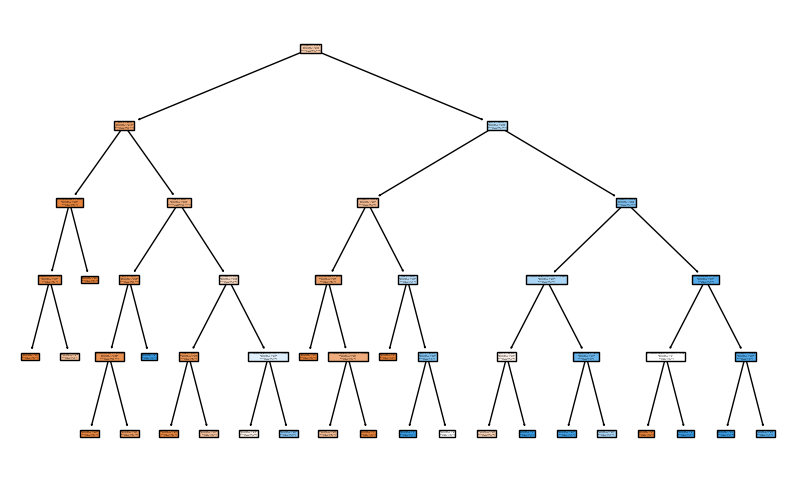

In [43]:
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=X_train.columns, class_names=['N','P'], filled=True)
plt.show()

In [47]:
text_repr = export_text(model, feature_names=list(X_train.columns))
print(text_repr)

|--- Glucose <= 127.50
|   |--- BMI <= 26.40
|   |   |--- SkinThickness <= 13.50
|   |   |   |--- Pregnancies <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- Pregnancies >  2.50
|   |   |   |   |--- class: 0
|   |   |--- SkinThickness >  13.50
|   |   |   |--- class: 0
|   |--- BMI >  26.40
|   |   |--- Age <= 28.50
|   |   |   |--- BMI <= 45.40
|   |   |   |   |--- SkinThickness <= 29.08
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- SkinThickness >  29.08
|   |   |   |   |   |--- class: 0
|   |   |   |--- BMI >  45.40
|   |   |   |   |--- class: 1
|   |   |--- Age >  28.50
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- Age <= 43.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  43.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  99.50
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.52
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.52
|   |   |   |   |   |--- class: 1
|--- Glucose >  127.50
